# Employee Churn

## Preprocessing
### In preprocessing we must;
* upload the dataset
* Remove any null values
* Identify and handle missing values
* encode categorical data
* 

In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

### Here we take a look at the original dataset

In [3]:
df_raw = pd.read_csv('EmployeeData.csv')
df_raw.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df_raw.shape

(14999, 10)

In [5]:
df_raw.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Check & Remove any Null Values

In [6]:
df_raw.notnull()
df_nonull = df_raw.dropna()
df_nonull

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### youll notice that there were not any null values

## Check and Remove Outliers

In [7]:
list(df_nonull.columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [8]:
def plot_boxplot(df, feature):
    print(feature)
    df.boxplot(column=[feature])
    plt.grid(False)
    plt.show()


satisfaction_level


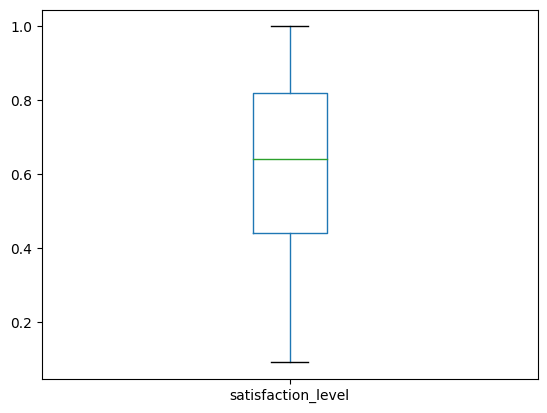

last_evaluation


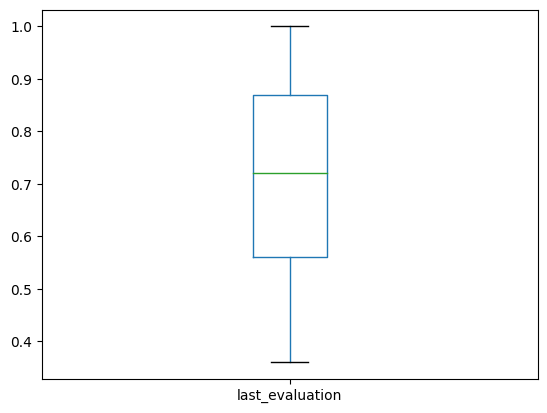

number_project


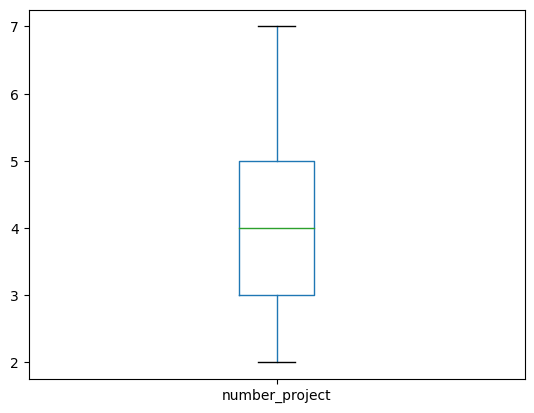

average_montly_hours


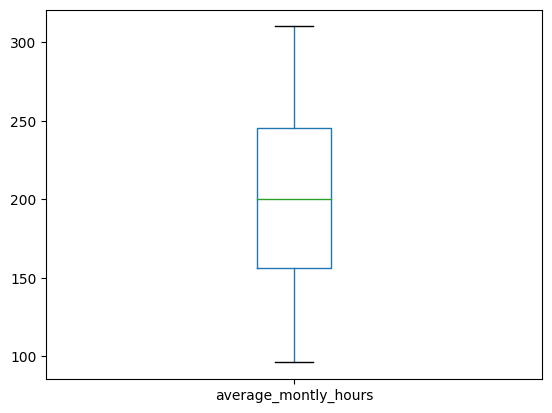

time_spend_company


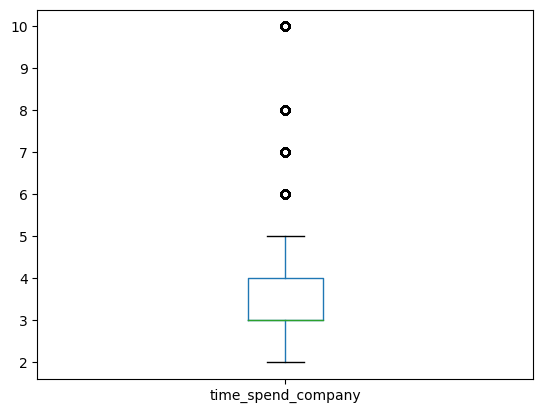

In [9]:
#boxplots for all of our numerical values
plot_boxplot(df_nonull, 'satisfaction_level')
plot_boxplot(df_nonull, 'last_evaluation')
plot_boxplot(df_nonull, 'number_project')
plot_boxplot(df_nonull, 'average_montly_hours')
plot_boxplot(df_nonull, 'time_spend_company')

### Overall I feel the outliers present in 'time_spend_company' were relevant ans shoudl stay in the data for us to analyze

## Now me must use PCA in order to reduce the dimensions of our model so that we can avoid multicollinearity

### First we must find the eigenvectors and eigenvalues

In [10]:
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
from sklearn.decomposition import PCA

### In R I created a scree plot to determine the number of feautres to use for PCA

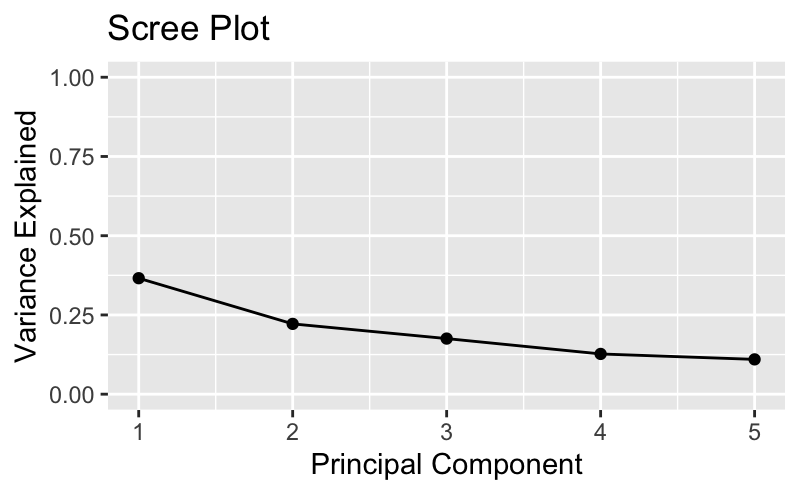

In [34]:
#Creating Dummies
dummies = pd.get_dummies(df_nonull.sales)
merged = pd.concat([scaled_df, dummies], axis = 1)

dummies2 = pd.get_dummies(df_nonull.salary)
merged2 = pd.concat([merged, dummies2], axis = 1)

left = df_nonull['left']
merged3 = pd.concat([merged2, left], axis = 1)

new = merged3.drop(columns=['RandD', 'medium'])
new 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,IT,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,0,0,0,0,0,0,1,0,0,0,1,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,0,0,0,0,0,0,1,0,0,0,0,1
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0,0,0,0,0,0,1,0,0,0,0,1
3,0.431041,0.899131,0.971113,0.439508,1.028546,0,0,0,0,0,0,1,0,0,0,1,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,0,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,0,0,0,0,0,0,0,1,0,0,1,1
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,0,0,0,0,0,0,0,1,0,0,1,1
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,0,0,0,0,0,0,0,1,0,0,1,1
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,0,0,0,0,0,0,0,1,0,0,1,1


In [ ]:
dfnonull = df_nonull[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]

In [35]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
  
# transform data
df = scaler.fit_transform(dfnonull)

from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(df)

x_pca = pca.transform(df)

dummymerge = pd.concat([dummies, dummies2], axis = 1)
newdummy = dummymerge.drop(columns=['RandD', 'medium'])
y = newdummy.to_numpy()

#combine the binary and the standardized
arr = np.concatenate((x_pca, y), axis=1)


In [1]:
#Visualize the principal components
plt.scatter(arr[:,0],arr[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()
#Visualize the principal components with a color scheme
plt.scatter(arr[:,0], arr[:,1], c=new['left'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

NameError: name 'plt' is not defined

# Exploratory Data Analysis 